# Evaluation Project - 7 : Customer Churn Analysis

**Project Description :**

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [242]:
# Importing Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [243]:
# Importing the Dataset:

churn=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [244]:
# To display top 5 rows:

churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [245]:
# To display total number of rows and columns:

churn.shape

(7043, 21)

**There are 7043 rows and 21 columns present in this dataset.**

In [246]:
# To display all the columns:

churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [247]:
# Checking dataypes of all the columns:

churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**There are int64 , object & float64 datatype present.**

In [248]:
# To fetch the descriptive statistics of continuous data:

churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**There are only 3 columns which have continuous data i.e SeniorCitizen , tenure & MonthlyCharges.**

In [249]:
# To get the brief information of data:

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [250]:
# Finding the null values:

churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Great , there are no null values , We can go ahead.**

In [251]:
# As we have to predict the target variabe only , so let's start working on Target Variable

In [252]:
# To get the unique value in target variable:

churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

**There are only two values in the target variable.**

In [253]:
# To get the value counts of values in the Target Variable:

churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [254]:
# Checking unique elements for each column:

churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Data Cleaning

In [255]:
churn['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [256]:
churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [257]:
churn["SeniorCitizen"]= churn["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [258]:
# To verify , if the values mapped or not:

churn['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [259]:
# Converting Data Type of column "TotalCharges" as this column contains numeric values but datatype is showing object

In [260]:
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'],errors='coerce')

In [261]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [262]:
# finding the null values again:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**We observed that there are 11 null values in "TotalCharges" . Let's fill the null values.**

In [263]:
#Filling Null Values of "TotalCharges" column in dataset by mean value

churn["TotalCharges"].fillna(churn["TotalCharges"].mean(), inplace=True)

In [264]:
# To verify , if the null values are filled or not:

churn['TotalCharges'].isnull().sum()

0

In [265]:
# Let's drop 'customerID' as it has no relation with our Target column:

In [266]:
churn=churn.drop(columns="customerID", axis=1)

In [267]:
# To verify , if the column is dropped or not:
churn.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


# Data Visualization

**Univariate Analysis**

Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

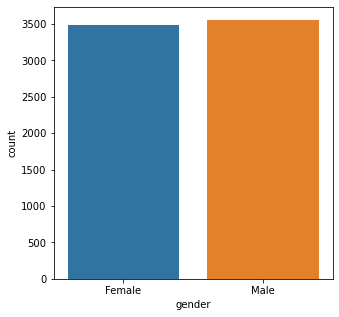

In [268]:
#Count Plot for "gender" column
print(churn["gender"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("gender",data=churn)

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

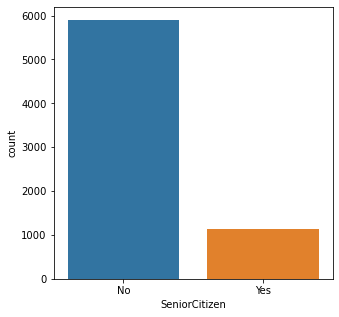

In [269]:
#Count Plot for "SeniorCitizen" column
print(churn["SeniorCitizen"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("SeniorCitizen",data=churn)

No     3641
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

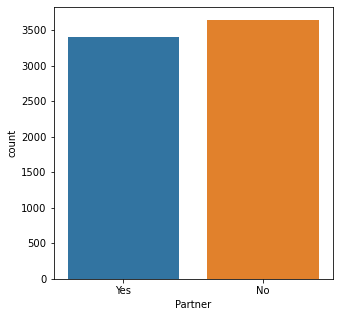

In [270]:
#Count Plot for "Partner" column
print(churn["Partner"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Partner",data=churn)

No     4933
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

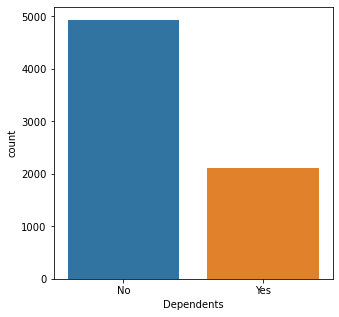

In [271]:
#Count Plot for "Dependents" column
print(churn["Dependents"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Dependents",data=churn)

Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

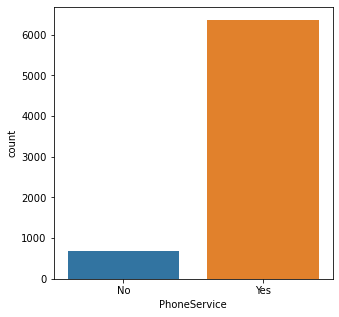

In [272]:
#Count Plot for "PhoneService" column
print(churn["PhoneService"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("PhoneService",data=churn)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

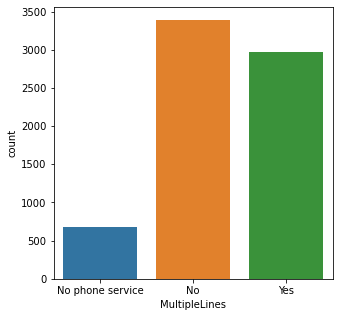

In [273]:
#Count Plot for "MultipleLines" column
print(churn["MultipleLines"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("MultipleLines",data=churn)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

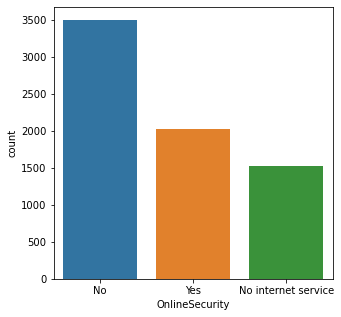

In [274]:
#Count Plot for "OnlineSecurity" column
print(churn["OnlineSecurity"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("OnlineSecurity",data=churn)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

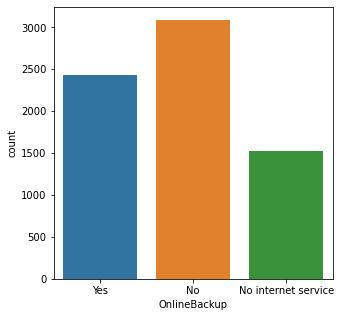

In [275]:
#Count Plot for "OnlineBackup" column
print(churn["OnlineBackup"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("OnlineBackup",data=churn)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

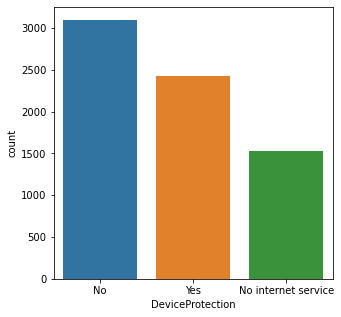

In [276]:
#Count Plot for "DeviceProtection" column
print(churn["DeviceProtection"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("DeviceProtection",data=churn)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

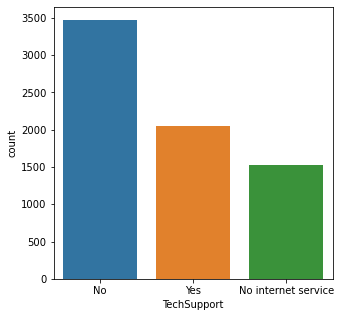

In [277]:
#Count Plot for "TechSupport" column
print(churn["TechSupport"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("TechSupport",data=churn)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

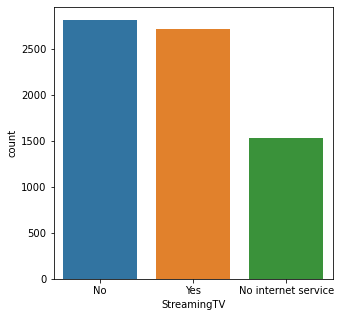

In [278]:
#Count Plot for "StreamingTV" column
print(churn["StreamingTV"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("StreamingTV",data=churn)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

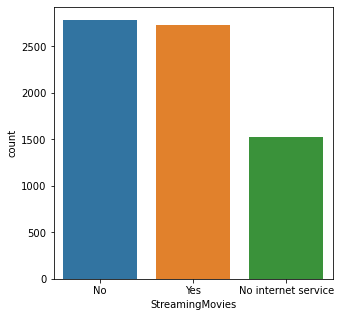

In [279]:
#Count Plot for "StreamingMovies" column
print(churn["StreamingMovies"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("StreamingMovies",data=churn)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

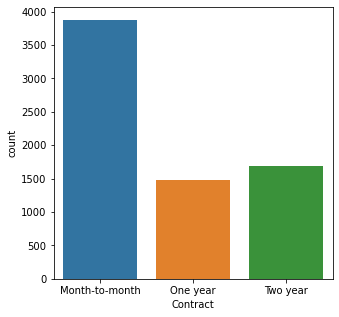

In [280]:
#Count Plot for "Contract" column
print(churn["Contract"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Contract",data=churn)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

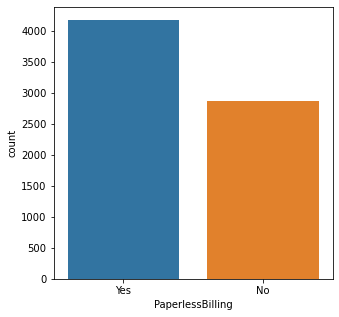

In [281]:
#Count Plot for "PaperlessBilling" column
print(churn["PaperlessBilling"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("PaperlessBilling",data=churn)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

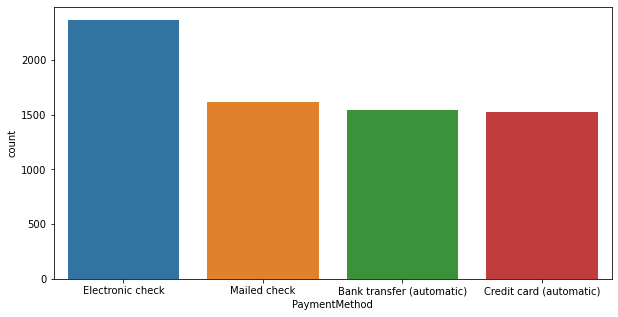

In [282]:
#Count Plot for "PaymentMethod" column
print(churn["PaymentMethod"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("PaymentMethod",data=churn)

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

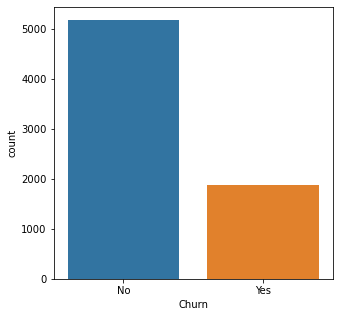

In [283]:
#Count Plot for "Churn" column
print(churn["Churn"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Churn",data=churn)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


<AxesSubplot:xlabel='tenure', ylabel='Count'>

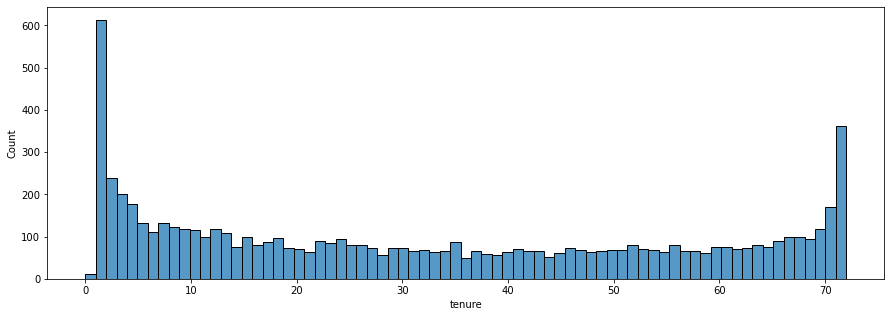

In [284]:
#Histplot for "tenure" column
print(churn["tenure"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='tenure',data=churn,bins=73)

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

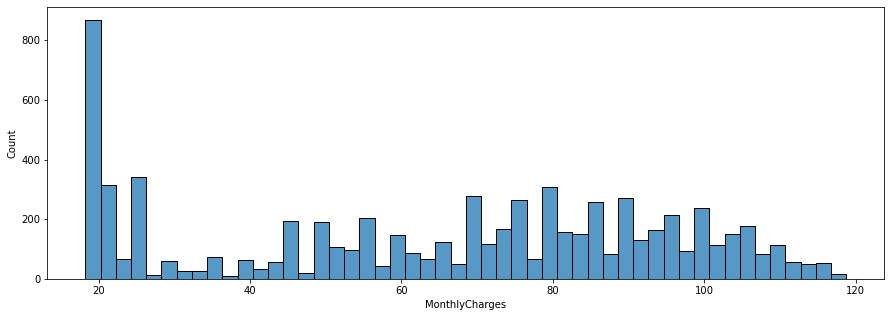

In [285]:
#Histplot for "MonthlyCharges" column
print(churn["MonthlyCharges"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='MonthlyCharges',data=churn,bins=50)

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

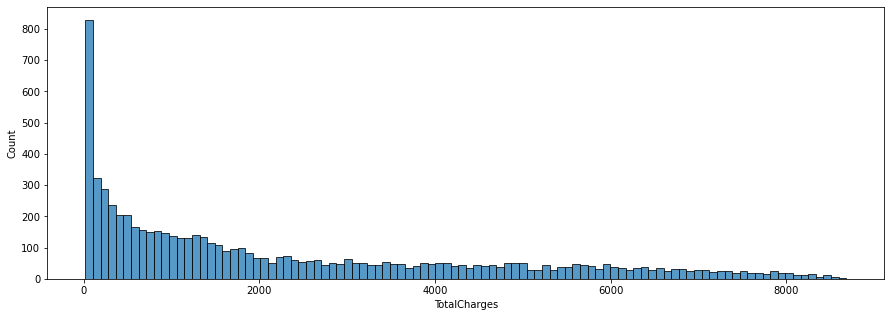

In [286]:
#Histplot for "TotalCharges" column
print(churn["TotalCharges"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='TotalCharges',data=churn,bins=100)

**Bivariate Analysis:**

<AxesSubplot:xlabel='gender', ylabel='count'>

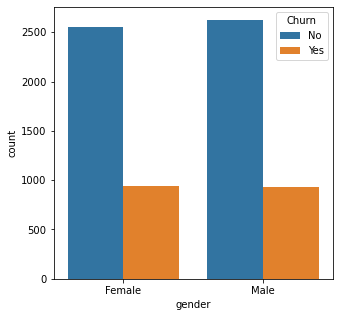

In [287]:
#Count Plot for comparision between "gender" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("gender",data=churn, hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

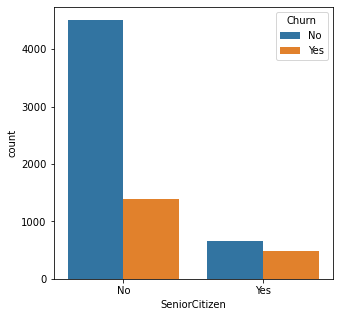

In [288]:
#Count Plot for comparision between "SeniorCitizen" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("SeniorCitizen",data=churn, hue='Churn')

<AxesSubplot:xlabel='Partner', ylabel='count'>

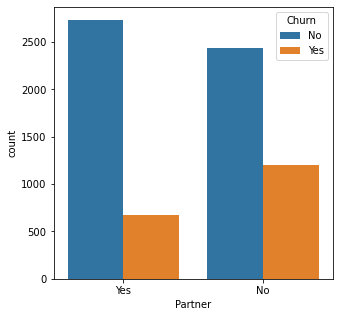

In [289]:
#Count Plot for comparision between "Partner" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("Partner",data=churn, hue='Churn')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

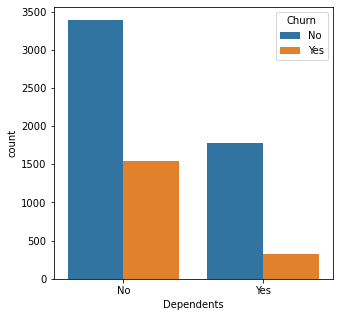

In [290]:
#Count Plot for comparision between "Dependents" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("Dependents",data=churn, hue='Churn')

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

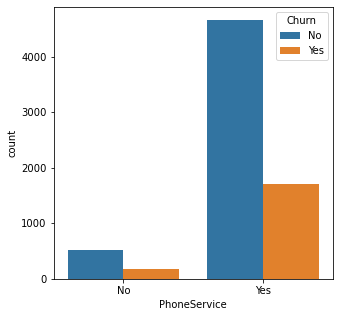

In [291]:
#Count Plot for comparision between "PhoneService" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("PhoneService",data=churn, hue='Churn')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

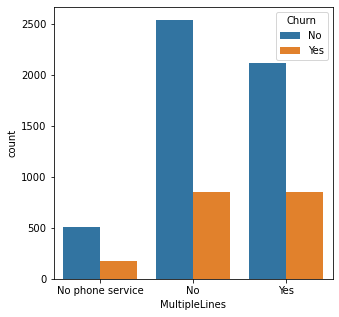

In [292]:
#Count Plot for comparision between "MultipleLines" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("MultipleLines",data=churn, hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

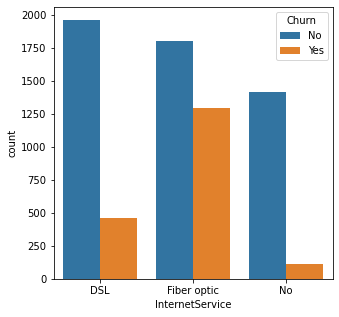

In [293]:
#Count Plot for comparision between "InternetService" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("InternetService",data=churn, hue='Churn')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

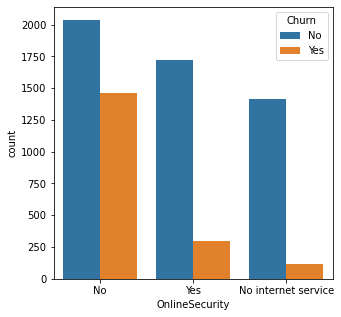

In [294]:
#Count Plot for comparision between "OnlineSecurity" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("OnlineSecurity",data=churn, hue='Churn')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

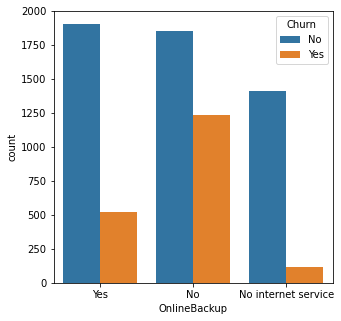

In [295]:
#Count Plot for comparision between "OnlineBackup" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("OnlineBackup",data=churn, hue='Churn')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

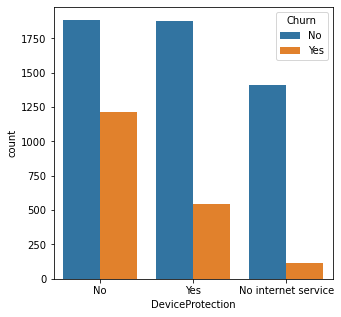

In [296]:
#Count Plot for comparision between "DeviceProtection" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("DeviceProtection",data=churn, hue='Churn')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

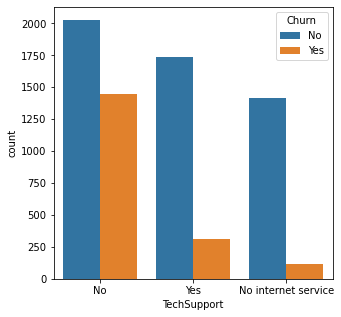

In [297]:
#Count Plot for comparision between "TechSupport" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("TechSupport",data=churn, hue='Churn')

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

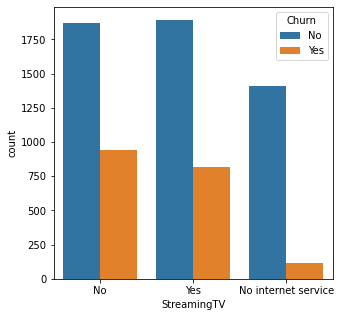

In [298]:
#Count Plot for comparision between "StreamingTV" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("StreamingTV",data=churn, hue='Churn')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

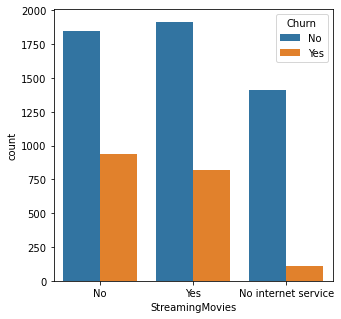

In [299]:
#Count Plot for comparision between "StreamingMovies" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("StreamingMovies",data=churn, hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

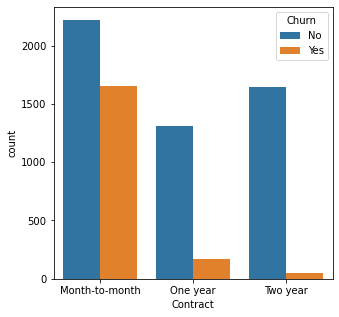

In [300]:
#Count Plot for comparision between "Contract" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("Contract",data=churn, hue='Churn')

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

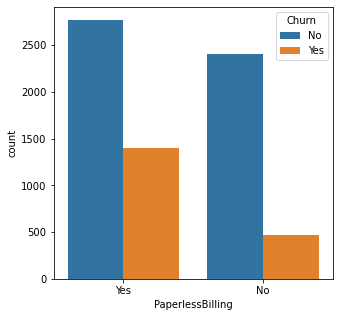

In [301]:
#Count Plot for comparision between "PaperlessBilling" column and "Churn" column
plt.figure(figsize=(5,5))
sns.countplot("PaperlessBilling",data=churn, hue='Churn')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

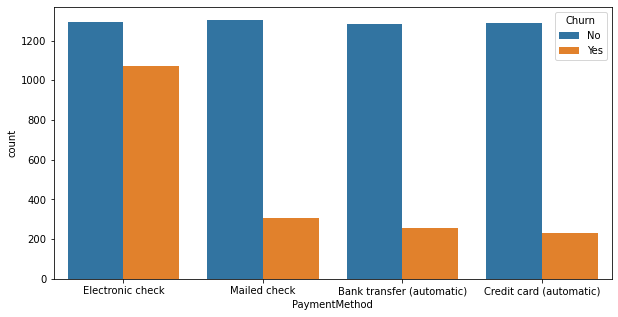

In [302]:
#Count Plot for comparision between "PaymentMethod" column and "Churn" column
plt.figure(figsize=(10,5))
sns.countplot("PaymentMethod",data=churn, hue='Churn')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

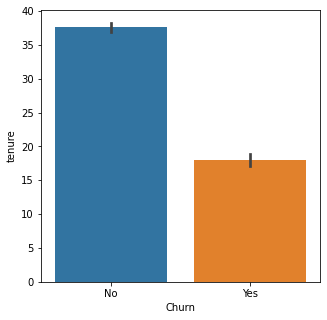

In [303]:
#Bar Plot for comparision between "tenure" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="tenure",data=churn, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

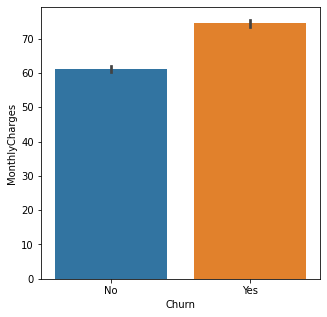

In [304]:
#barplot for comparision between "MonthlyCharges" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="MonthlyCharges",data=churn, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

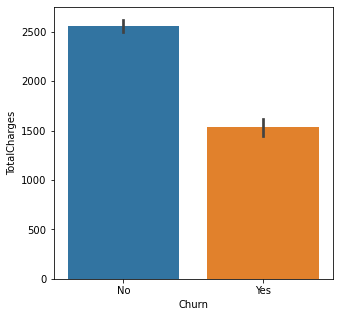

In [305]:
#barplot for comparision between "TotalCharges" column and "Churn" column
plt.figure(figsize=(5,5))
sns.barplot(y="TotalCharges",data=churn, x='Churn')

**There are many columns which have object datatype , so we have to convert datatype to int . So that it would be easier for model to understand.**

# Label Encoding

In [306]:
from sklearn.preprocessing import LabelEncoder

In [307]:
enc = LabelEncoder()
for i in churn.columns:
    if churn[i].dtypes=="object":
        churn[i]=enc.fit_transform(churn[i].values.reshape(-1,1))

In [308]:
# To veirfy , if the datatypes converted or not:
churn.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [309]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Checking Correlation:

In [310]:
churn.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


In [311]:
churn.corr()["Churn"].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

**Here we observed that Column 'MonthlyCharges' is highly correlated with Target column 'Churn' and Column 'Contract' is least correlated with Target column 'Churn'.**

<AxesSubplot:>

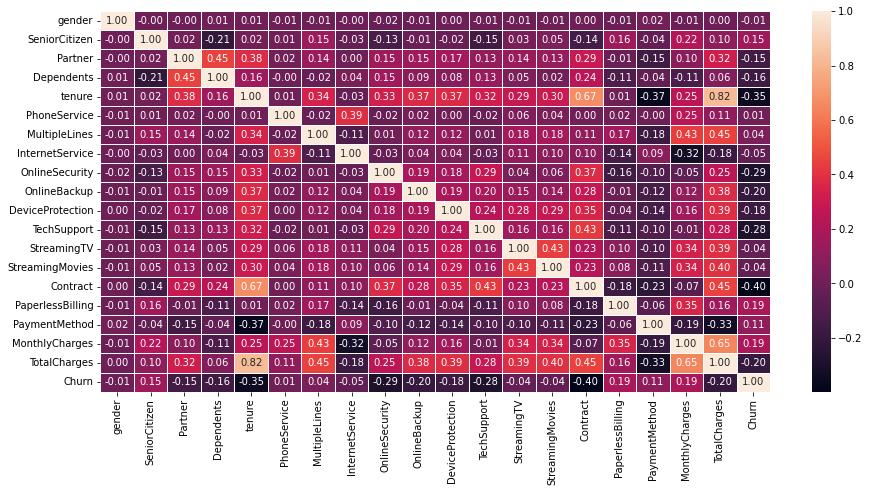

In [312]:
# Visualizing the correlation :

plt.figure(figsize=(15,7))
sns.heatmap(churn.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

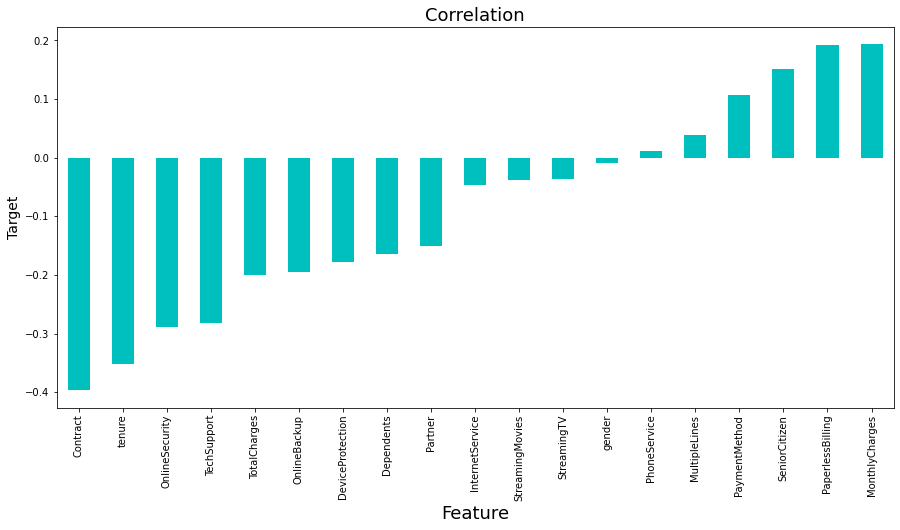

In [313]:
# Checking correlation using bar plot:

plt.figure(figsize=(15,7))
churn.corr()['Churn'].sort_values(ascending=True).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

**Again , MonthlyCharges the highest positive correlation with Target column 'Churn' and Contract have the highest negative correlation with Target column 'Churn'.**

# Outliers Detection

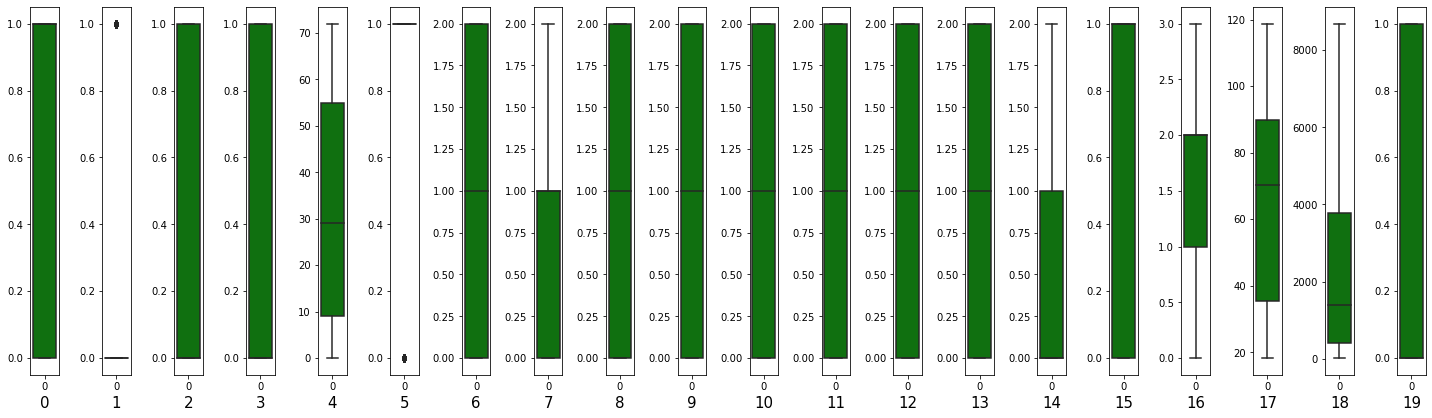

In [314]:
columns=churn.columns.values
ncol=21
nrows=11
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(columns)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=churn[columns[column]],color='green',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

**We observed that Outliers are present only in 2 columns: "SeniorCitizen" and "PhoneService". But both column are categorical, so we will not remove outliers..**

In [315]:
# Checking for the skewness:

churn.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

**Observations:**

     Skewness threshold taken is +/-0.25
     All the columns are not normallly distributed, they are skewed.
     Columns which are having skewness: SeniorCitizen, Dependents, PhoneService, OnlineSecurity, TechSupport, Contract,PaperlessBilling and TotalCharges.
     Since SeniorCitizen, Dependents, PhoneService, OnlineSecurity, TechSupport, Contract and PaperlessBilling are categorical column so we will not remove skewness from them.
    Only we will remove skewness from TotalCharges as this column contains continuous data.

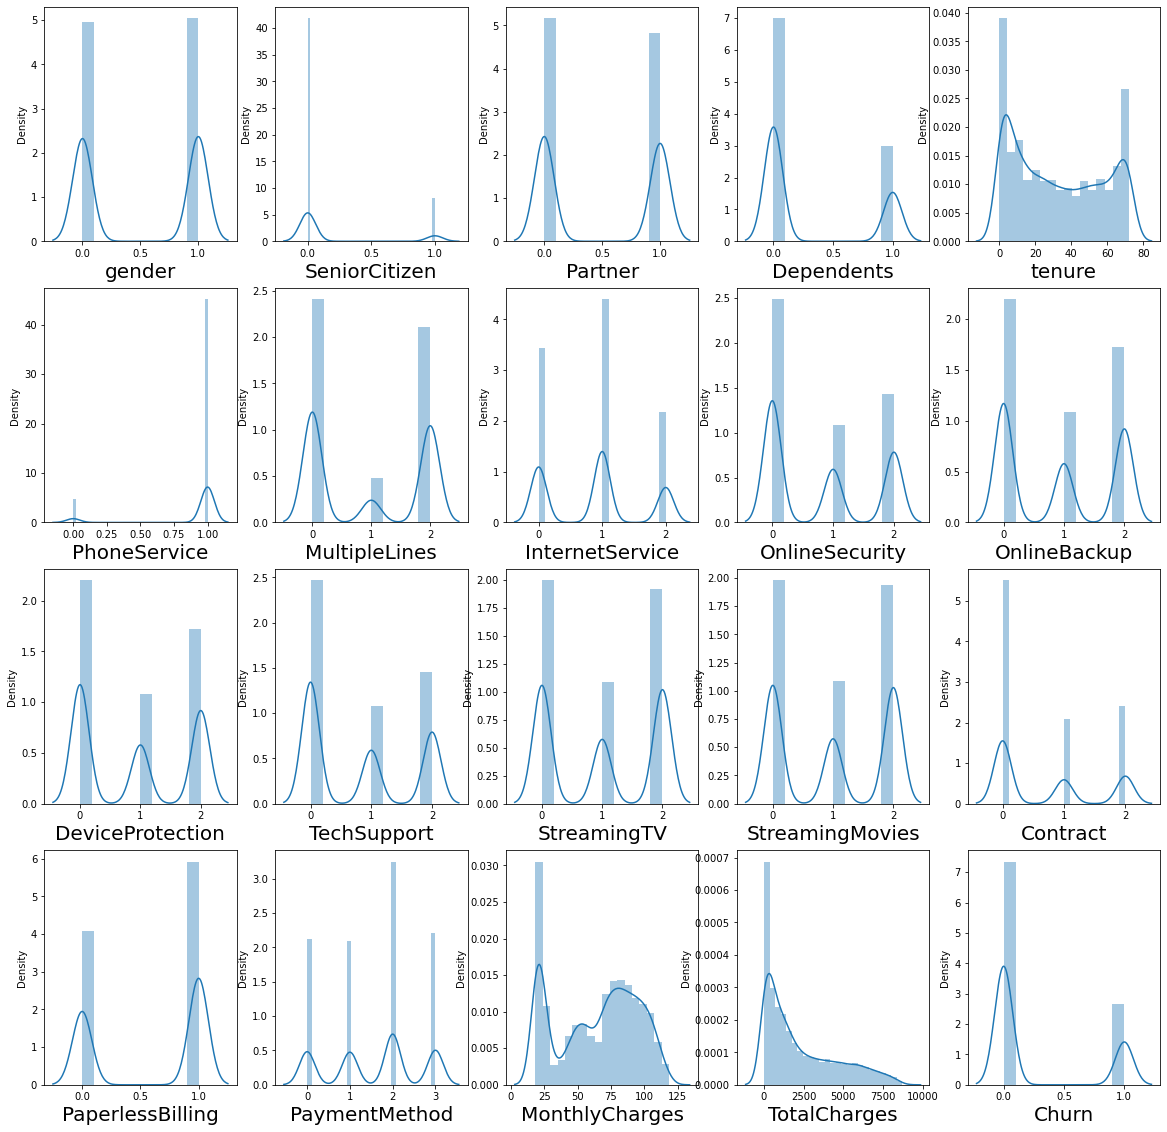

In [316]:
# Checking skewness through visualization:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in churn:
    if plotnumber<=21:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(churn[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**There is some skewness present in the data , so we need to handle.**

In [317]:
# Let's remove  skewness using yeo-johnson method:

In [318]:
from sklearn.preprocessing import PowerTransformer

In [319]:
columns=['TotalCharges']
churn[columns]=power_transform(churn[columns],method='yeo-johnson')
churn[columns]

,TotalCharges
0,-1.810588
1,0.253313
2,-1.387269
3,0.232253
4,-1.250118
...,...
7038,0.295688
7039,1.567097
7040,-0.859899
7041,-0.922968


In [320]:
# To verify , if the skewness treated or not:
churn.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.144899
Churn               1.063031
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

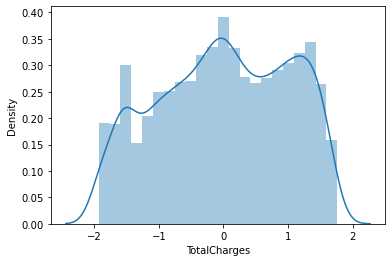

In [321]:
sns.distplot(churn['TotalCharges'])

**We observed that It's not normal distribution ,but the skewness has got removed compared to the old data.**

# Data Preprocessing

**Splitting the training and testing dataset:**

In [322]:
x=churn.drop("Churn",axis=1)
y=churn["Churn"]

In [323]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [324]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118


In [325]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [326]:
x.shape, y.shape

((7043, 19), (7043,))

In [327]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

In [328]:
# Oversampling using the SMOTE:

In [329]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [330]:
Smote = SMOTE()
x, y = Smote.fit_resample(x,y)
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [331]:
# Let's standardize the data

In [332]:
scaler = StandardScaler()

In [333]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [334]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.889169,-0.408846,1.275564,-0.526363,-1.106110,-3.027380,0.055344,-1.256128,-0.759894,1.412594,-0.896936,-0.766229,-1.051559,-1.057061,-0.642634,0.821239,0.421198,-1.319773,-1.650443
1,1.124646,-0.408846,-0.783967,-0.526363,0.264955,0.330319,-1.009153,-1.256128,1.690522,-0.887205,1.395639,-0.766229,-1.051559,-1.057061,0.665386,-1.217672,1.423167,-0.378880,0.375958
2,1.124646,-0.408846,-0.783967,-0.526363,-1.064562,0.330319,-1.009153,-1.256128,1.690522,1.412594,-0.896936,-0.766229,-1.051559,-1.057061,-0.642634,0.821239,1.423167,-0.486510,-1.234816
3,1.124646,-0.408846,-0.783967,-0.526363,0.721977,-3.027380,0.055344,-1.256128,1.690522,-0.887205,1.395639,1.668948,-1.051559,-1.057061,0.665386,-1.217672,-1.582738,-0.887518,0.355280
4,-0.889169,-0.408846,-0.783967,-0.526363,-1.064562,0.330319,-1.009153,0.222140,-0.759894,-0.887205,-0.896936,-0.766229,-1.051559,-1.057061,-0.642634,0.821239,0.421198,0.098510,-1.100157


In [335]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.889169,-0.408846,1.275564,-0.526363,-1.106110,-3.027380,0.055344,-1.256128,-0.759894,1.412594,-0.896936,-0.766229,-1.051559,-1.057061,-0.642634,0.821239,0.421198,-1.319773,-1.650443
1,1.124646,-0.408846,-0.783967,-0.526363,0.264955,0.330319,-1.009153,-1.256128,1.690522,-0.887205,1.395639,-0.766229,-1.051559,-1.057061,0.665386,-1.217672,1.423167,-0.378880,0.375958
2,1.124646,-0.408846,-0.783967,-0.526363,-1.064562,0.330319,-1.009153,-1.256128,1.690522,1.412594,-0.896936,-0.766229,-1.051559,-1.057061,-0.642634,0.821239,1.423167,-0.486510,-1.234816
3,1.124646,-0.408846,-0.783967,-0.526363,0.721977,-3.027380,0.055344,-1.256128,1.690522,-0.887205,1.395639,1.668948,-1.051559,-1.057061,0.665386,-1.217672,-1.582738,-0.887518,0.355280
4,-0.889169,-0.408846,-0.783967,-0.526363,-1.064562,0.330319,-1.009153,0.222140,-0.759894,-0.887205,-0.896936,-0.766229,-1.051559,-1.057061,-0.642634,0.821239,0.421198,0.098510,-1.100157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.889169,-0.408846,-0.783967,-0.526363,-1.106110,0.330319,-1.009153,0.222140,0.465314,-0.887205,-0.896936,-0.766229,-1.051559,1.159897,-0.642634,0.821239,1.423167,0.582972,-1.325229
10344,1.124646,-0.408846,1.275564,-0.526363,-0.192066,0.330319,-1.009153,0.222140,-0.759894,-0.887205,1.395639,-0.766229,1.162609,1.159897,-0.642634,0.821239,-0.580770,0.881122,0.503370
10345,-0.889169,-0.408846,-0.783967,-0.526363,-0.649088,0.330319,-1.009153,-1.256128,-0.759894,-0.887205,-0.896936,1.668948,0.055525,-1.057061,-0.642634,0.821239,0.421198,-0.260626,-0.299877
10346,-0.889169,-0.408846,-0.783967,-0.526363,-0.565993,0.330319,-1.009153,0.222140,1.690522,0.262694,-0.896936,1.668948,1.162609,1.159897,-0.642634,-1.217672,0.421198,1.310509,0.167378


In [336]:
# Checking for Multicollinearity using Variance Inflation Factor

In [337]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.014879,gender
1,1.094876,SeniorCitizen
2,1.549676,Partner
3,1.427076,Dependents
4,11.195099,tenure
5,1.726634,PhoneService
6,1.409552,MultipleLines
7,1.739439,InternetService
8,1.343105,OnlineSecurity
9,1.241379,OnlineBackup


**The VIF value is more than 10 in the columns 'tenure' and 'TotalCharges'. But column 'TotalCharges' is having highest VIF value. So, we will drop column 'TotalCharges'.**

In [338]:
x.drop('TotalCharges', axis =1, inplace=True)

In [339]:
# To verify
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [340]:
# To verify:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.014520,gender
1,1.094850,SeniorCitizen
2,1.547209,Partner
3,1.425185,Dependents
4,2.824423,tenure
5,1.726634,PhoneService
6,1.401630,MultipleLines
7,1.716531,InternetService
8,1.336063,OnlineSecurity
9,1.239602,OnlineBackup


**We observed that Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.**

In [341]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=94)

In [342]:
x.shape, y.shape

((10348, 18), (10348,))

In [343]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((7243, 18), (7243,), (3105, 18), (3105,))

**Logistic Regression:**

In [344]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.8061191626409018
confusion_matrix: 
 [[1190  347]
 [ 255 1313]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      1537
           1       0.79      0.84      0.81      1568

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



**Random Forest Classifier:**

In [345]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8470209339774557
confusion_matrix: 
 [[1278  259]
 [ 216 1352]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1537
           1       0.84      0.86      0.85      1568

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



**Decision Tree Classifier:**

In [346]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.7987117552334944
confusion_matrix: 
 [[1221  316]
 [ 309 1259]]
classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1537
           1       0.80      0.80      0.80      1568

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



**Support Vector Machine Classifier:**

In [347]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.8
confusion_matrix: 
 [[1144  393]
 [ 228 1340]]
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.74      0.79      1537
           1       0.77      0.85      0.81      1568

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



**KNN Classifier:**

In [348]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.7900161030595814
confusion_matrix: 
 [[1099  438]
 [ 214 1354]]
classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.72      0.77      1537
           1       0.76      0.86      0.81      1568

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105



**XGB Classifier:**

In [349]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [350]:
from xgboost import XGBClassifier

XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_XGBC))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_XGBC))
print("classification_report: \n",classification_report(y_test,pred_XGBC))

accuracy_score:  0.8431561996779388
confusion_matrix: 
 [[1272  265]
 [ 222 1346]]
classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1537
           1       0.84      0.86      0.85      1568

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [351]:
# Checking cross validation score for all the models:

In [352]:
#CV Score for Logistic Regression
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

#CV Score for Random Forest Classifier
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

#CV Score for Decision Tree Classifier
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

#CV Score for Support Vector Classifier
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

#CV Score for KNN Classifier
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for XGB Classifier
print('CV score for XGB Classifier: ',cross_val_score(XGBC,x,y,cv=5).mean())

CV score for Logistic Regression:  0.7894325481048746
CV score for Random forest Classifier:  0.837562452864111
CV score for Decision Tree Classifier:  0.7876953789900604
CV score for Support Vector  Classifier:  0.7839221729557325
CV score for KNN Classifier:  0.7812188202660392
CV score for XGB Classifier:  0.8326353836131718


**From the observation of accuracy and cross validation score and their difference we can predict that RFC Classifier is the best model.**

# Hyper parameter tuning:

In [353]:
from sklearn.model_selection import KFold

In [354]:
parameters={
    'max_depth': [2,3,4],
    'max_features': ['auto', 'sqrt'],
    'max_samples':[0,0.1,0.001,1],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300,500]}

In [355]:
CV_RFC = GridSearchCV(rfc, param_grid= parameters, scoring= 'accuracy', cv= 5)

In [356]:
CV_RFC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0, 0.1, 0.001, 1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [357]:
CV_RFC.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 300}

In [359]:
Customer_Churn=RandomForestClassifier(n_estimators=300, criterion='gini',max_depth=2, max_features='auto',max_samples=0.1)
Customer_Churn.fit(x_train,y_train)
predict=Customer_Churn.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,predict))
print("confusion_matrix: \n",confusion_matrix(y_test,predict))
print("classification_report: \n",classification_report(y_test,predict))

accuracy score:  0.7861513687600644
confusion_matrix: 
 [[1106  431]
 [ 233 1335]]
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1537
           1       0.76      0.85      0.80      1568

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.78      3105
weighted avg       0.79      0.79      0.79      3105



In [361]:
Accuracy=accuracy_score(y_test,predict)
print(Accuracy*100)

78.61513687600645


In [362]:
# Saving the model:
import pickle
filename='Customer_churn.pickle'
pickle.dump(CV_RFC,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [363]:
# Comparing actual and predicted values:
a =np.array(y_test)
predicted=np.array(CV_RFC.predict(x_test))
Output=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Output

,Orginal,Predicted
0,0,1
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
3100,0,0
3101,1,1
3102,0,0
3103,1,1


In [364]:
# Saving the output in csv format:
Output_ =Output.to_csv('Result')
Output_

# Conclusion:

**We got the great accuracy score using random forest classifier . Achieving this much of accuracy indicates that model is performing good and also we observed that the actual and predicted values are approximately same.**